<a href="https://colab.research.google.com/github/EstherOgutu/Nairobi-Hospital-Hypothyroidism-Analysis/blob/main/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI HOSPITAL THYROID PATIENTS ANALYSIS

##1. Defining the Question

###a) Specifying the Data Analytic Question


This is an analysis to determine whether or not the patient's symptoms indicate that the patient has hypothyroid. Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

###b) Defining the Metric of Success


The metric of success for this project is to build a model that can predic whether or not the patient's symptoms indicate that the patient has hypothyroid. The accuracy level of the prediction model should be atleast 95% to be termed as a good model.

###c) Understanding the Context


Nairobi Hospital is among the most reputable private hosiptal in Kenya.It specializes in the treatment of many diseases, among them is hypothyroidism, which is a common condition where the thyroid doesn't create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidying the datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate,Bivariate, and Multivariate).

5 Performing Predictive Anaysis using:

   1: Decision trees:Random forests, Ada boosted trees, and gradient boosted trees.

  2: SVM: Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step 

6.Challenge your solution by providing insights on how you can make improvements in model improvement.



###e) Data Relevance

The data has been provided by Nairobi Hospital. The data has attributes that are crucial for the company, since it will help the hospital to predict how many patients are at the risk of developing hypothyroid. Early detection helps in treating the disease before it becomes severe.

##2. Reading Data

In [157]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
# Let's expand the no of visible columns of dataframe
pd.set_option("display.max.columns", None)

In [159]:
# Reading the data from the dataset
hypothyroid=pd.read_csv('hypothyroid.csv')

##3. Checking the data

In [160]:
# Previewing the first five record in the dataset
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [161]:
# Previewing the first five record in the dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [162]:
# Checking the shape of the datasets (rows and columns)
hypothyroid.shape

(3163, 26)

Our housing dataset has 21613 rows and 20 columns

In [163]:
# Understanding our housing dataset 
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [164]:
# Checking all the columns have the appropriate datatype
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [165]:
# Checking the statistical information of the numerical values in our datasets
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [166]:
# Dropping all records with "?" in the age column
new_hypothyroid = hypothyroid[hypothyroid.age != '?']

In [167]:
# Replacing all the values in our columns 'TSH','T3','TT4','T4U','FTI','TBG that have "?" with 0 
new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']] = new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']].replace(['?'],0)

In [168]:
# Checking our dataset after cleaning it
new_hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0


In [169]:
 # Converting the columns 'TSH','T3','TT4','T4U','FTI' from object datatype to float and 'age' from object to int
new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']] = new_hypothyroid[['TSH','T3','TT4','T4U','FTI','TBG']].astype(float, errors = 'raise')
new_hypothyroid['age'] = new_hypothyroid['age'].astype(int, errors = 'raise')

In [170]:
# Checking the dtypes of the new dataset
new_hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [171]:
# Checking the old and new shape of our dataset after some cleaning, plus calculating the percentage of data lost
print('Old Shape' +str(hypothyroid.shape))
print('New Shape' +str(new_hypothyroid.shape))
data_lost = hypothyroid.shape[0] - new_hypothyroid.shape[0]
percent = (data_lost / hypothyroid.shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(3163, 26)
New Shape(2717, 26)
Number of data samples lost: 446
Percent of data samples lost: 14.1


We've lost 14.1% of our data, which is not bad for our analysis.

In [172]:
# Checking the statistical information of the numerical values in our datasets
new_hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2717.00000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,5.07495,1.492050,100.366544,0.909993,103.050350,2.636768
std,19.294405,22.23196,1.205217,52.975889,0.343717,51.498236,10.363246
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,0.400000,76.000000,0.830000,84.000000,0.000000
50%,54.000000,0.30000,1.600000,100.000000,0.950000,104.000000,0.000000
75%,67.000000,1.70000,2.200000,125.000000,1.060000,126.000000,0.000000
max,98.000000,530.00000,10.200000,450.000000,2.030000,450.000000,122.000000


##4. External Data Source Validation

The data has been obtained from Nairobi Hospital, which is the company for which I am conducting the analysis for. The data is, therefore valid and credible.

##5. Tidying the Datasets

In [173]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(new_hypothyroid)

        FTI  FTI_measured     T3  T3_measured    T4U  T4U_measured    TBG  \
0      True         False  False        False   True         False  False   
1      True         False  False        False  False         False  False   
2      True         False  False        False  False         False  False   
3      True         False  False        False  False         False  False   
4     False         False  False        False  False         False  False   
...     ...           ...    ...          ...    ...           ...    ...   
3158  False         False  False        False  False         False  False   
3159  False         False  False        False  False         False  False   
3160  False         False  False        False  False         False  False   
3161  False         False  False        False   True         False  False   
3162  False         False  False        False  False         False  False   

      TBG_measured    TSH  TSH_measured    TT4  TT4_measured    age  goitre

In [174]:
# Identifying Outliers with Skewness
def skewness(data):
  print(data.skew())
  print(tabulate(data.describe(), headers='keys', tablefmt='psql'))
skewness(new_hypothyroid)

age    -0.162462
TSH    11.182659
T3      1.114927
TT4     0.663182
T4U    -0.927255
FTI     0.462808
TBG     5.786058
dtype: float64
+-------+-----------+------------+------------+-----------+-------------+-----------+------------+
|       |       age |        TSH |         T3 |       TT4 |         T4U |       FTI |        TBG |
|-------+-----------+------------+------------+-----------+-------------+-----------+------------|
| count | 2717      | 2717       | 2717       | 2717      | 2717        | 2717      | 2717       |
| mean  |   51.1542 |    5.07495 |    1.49205 |  100.367  |    0.909993 |  103.05   |    2.63677 |
| std   |   19.2944 |   22.232   |    1.20522 |   52.9759 |    0.343717 |   51.4982 |   10.3632  |
| min   |    1      |    0       |    0       |    0      |    0        |    0      |    0       |
| 25%   |   35      |    0       |    0.4     |   76      |    0.83     |   84      |    0       |
| 50%   |   54      |    0.3     |    1.6     |  100      |    0.95     | 

Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.
For our case, the columns with extreme values are: TSH,T3, and TBG.

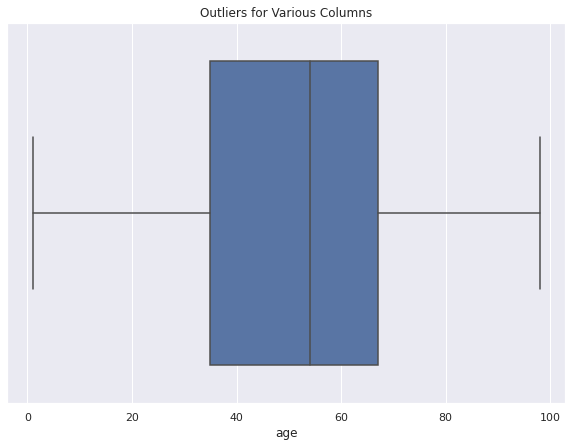

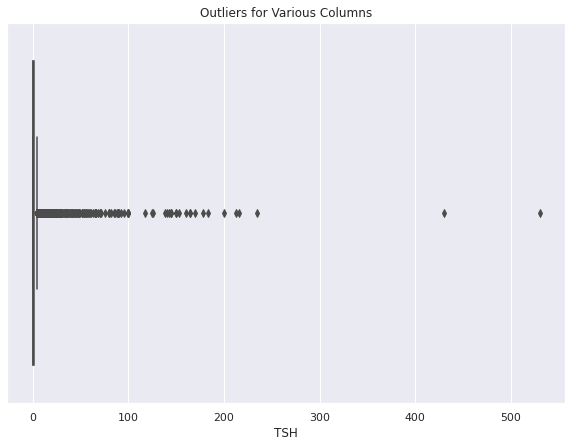

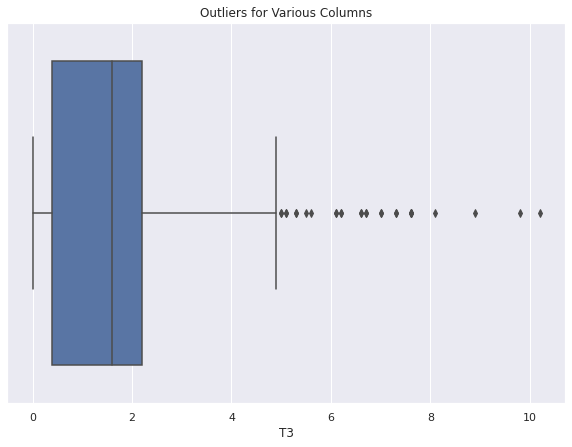

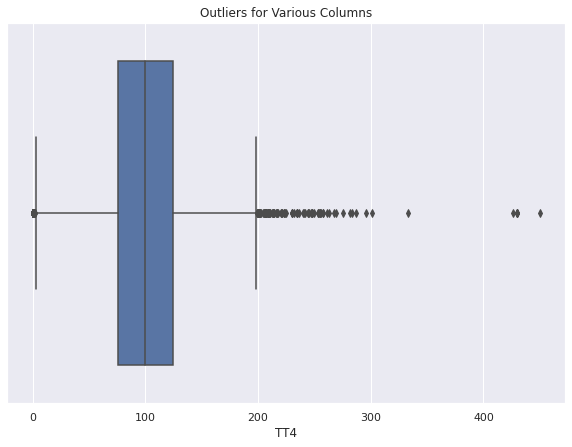

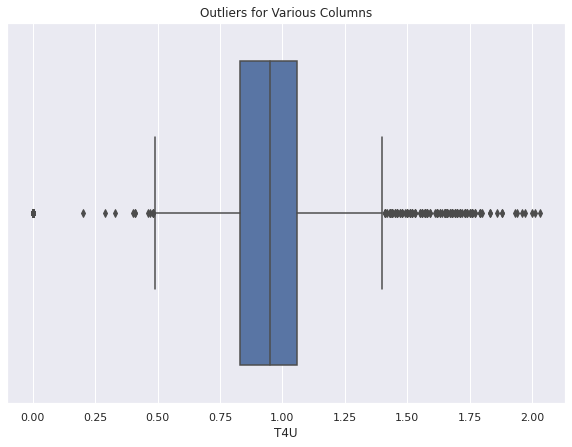

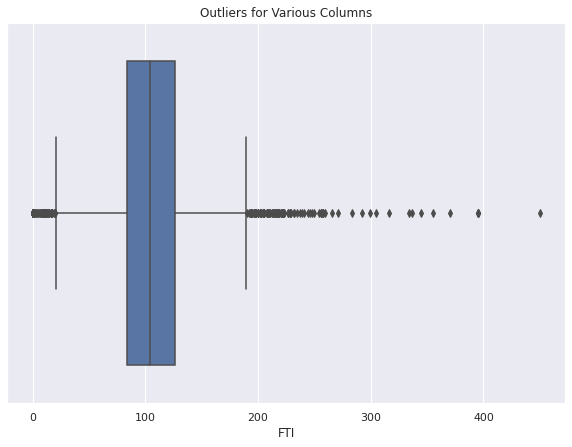

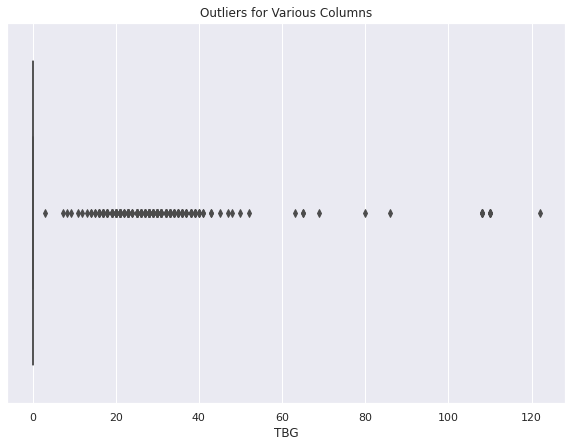

In [175]:
# Creating a function to plot outliers for each of the columns
def boxplot(data):
  fig = plt.figure(figsize =(10, 7))
  plt.title('Outliers for Various Columns')
  sns.boxplot(data)
  plt.show();
boxplot(new_hypothyroid['age'])
boxplot(new_hypothyroid['TSH'])
boxplot(new_hypothyroid['T3'])
boxplot(new_hypothyroid['TT4'])
boxplot(new_hypothyroid['T4U'])
boxplot(new_hypothyroid['FTI'])
boxplot(new_hypothyroid['TBG'])

From the boxplots, we see that the following columns have outliers'TSH','T3','TT4','T4U','FTI' and TBG.

In [176]:
# Separating numerical and categorical variables
categorical=new_hypothyroid.select_dtypes("object")
numerical=new_hypothyroid.select_dtypes("number")
print(categorical.columns)
print(numerical.columns)

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured'],
      dtype='object')
Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')


In [177]:
# Checking the index of the rows where we have outliers on TSH and TT4 columns
print(np.where(new_hypothyroid['TSH']>300))
print(np.where(new_hypothyroid['TT4']>400))

(array([ 3, 30]),)
(array([ 601,  648,  674,  891,  994, 1189]),)


In [178]:
# Checking the actual records to see if they are valid entries
new_hypothyroid.iloc[[3,31, 688,  736,  766, 1008, 1127, 1348]]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
32,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,0.0,y,55.0,y,0.93,y,60.0,n,0.0
800,negative,41,F,f,f,f,f,f,f,f,f,f,f,f,y,1.4,y,1.3,y,65.0,y,0.72,y,90.0,n,0.0
850,negative,79,F,f,f,f,t,t,f,f,f,f,f,f,y,0.8,y,1.7,y,111.0,y,0.87,y,127.0,n,0.0
885,negative,20,F,t,f,f,f,f,f,f,f,f,f,t,y,0.0,y,2.6,y,150.0,y,1.11,y,135.0,n,0.0
1167,negative,46,F,t,f,f,f,f,f,f,f,f,f,f,y,0.3,y,2.2,y,187.0,y,1.10,y,170.0,n,0.0
1303,negative,45,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,3.4,y,177.0,y,1.14,y,155.0,n,0.0
1572,negative,32,F,t,f,f,f,f,f,t,f,f,f,t,y,0.0,y,3.2,y,178.0,y,1.68,y,106.0,n,0.0


Based on our observations, the extreme values have valid entries, so we will not remove the ourliers. They will be very crucial in building our prediction model.

In [179]:
# Checking for Anomalies
# Defining a function to check for any duplicates in the datasets
def duplicates(data):
  print(data.duplicated().sum())
duplicates(new_hypothyroid)

69


In [180]:
# Displaying the duplicated rows in the dataset
duplicate = new_hypothyroid[new_hypothyroid.duplicated()]
duplicate

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.8,y,53.0,y,0.86,y,61.0,n,0.0
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0,n,0.0
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.5,y,33.0,y,0.67,y,49.0,n,0.0
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.6,y,47.0,y,0.97,y,48.0,n,0.0
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,0.0,y,55.0,y,0.93,y,60.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1.0,y,3.1,y,107.0,y,1.05,y,103.0,n,0.0
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,0.0,y,0.8,y,88.0,y,1.02,y,86.0,n,0.0
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.8,y,126.0,y,1.18,y,107.0,n,0.0
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82.0,y,0.80,y,103.0,n,0.0


We have 69 duplicate values in the dataset. On cross-checking, we realize that the duplication is justified because they are different entries, but have the same value in different columns. 
In this case, the duplicates will not be dropped.

In [181]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(new_hypothyroid)

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64


There are no missing values in our dataset.

In [182]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.
new_hypothyroid.columns = new_hypothyroid.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(new_hypothyroid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2717 non-null   object 
 1   age                        2717 non-null   int64  
 2   sex                        2717 non-null   object 
 3   on_thyroxine               2717 non-null   object 
 4   query_on_thyroxine         2717 non-null   object 
 5   on_antithyroid_medication  2717 non-null   object 
 6   thyroid_surgery            2717 non-null   object 
 7   query_hypothyroid          2717 non-null   object 
 8   query_hyperthyroid         2717 non-null   object 
 9   pregnant                   2717 non-null   object 
 10  sick                       2717 non-null   object 
 11  tumor                      2717 non-null   object 
 12  lithium                    2717 non-null   object 
 13  goitre                     2717 non-null   objec

In [183]:
# Exporting our cleaned fifa dataset
#
new_hypothyroid.to_csv("hthyroid.csv", index=False)

In [184]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
hthyroid_df=pd.read_csv('hthyroid.csv')

# Previewing the first five records using our tabulatetable function created earlier
hthyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [185]:
# Let's check for Nan values in the dataset
hthyroid_df.isnull().sum().sum()

0

Our dataset frames has no missing values

##6. Exploratory Data Analysis

###1. Univariate Analysis

In [186]:
# Getting a description of the statistics of numerical values
hthyroid_df.describe()

,age,tsh,t3,tt4,t4u,fti,tbg
count,2717.000000,2717.00000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,5.07495,1.492050,100.366544,0.909993,103.050350,2.636768
std,19.294405,22.23196,1.205217,52.975889,0.343717,51.498236,10.363246
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.00000,0.400000,76.000000,0.830000,84.000000,0.000000
50%,54.000000,0.30000,1.600000,100.000000,0.950000,104.000000,0.000000
75%,67.000000,1.70000,2.200000,125.000000,1.060000,126.000000,0.000000
max,98.000000,530.00000,10.200000,450.000000,2.030000,450.000000,122.000000


In [187]:
# Displaying the total value of the different status
hthyroid_df.status.value_counts()

negative       2581
hypothyroid     136
Name: status, dtype: int64

In [188]:
# Displaying the total value of the different on_thyroxine results
hthyroid_df.on_thyroxine.value_counts()

f    2284
t     433
Name: on_thyroxine, dtype: int64

In [189]:
# Displaying the total value of the different pregnancy results
hthyroid_df.pregnant.value_counts()

f    2658
t      59
Name: pregnant, dtype: int64

In [190]:
# Displaying the total value of the different tumor results
hthyroid_df.tumor.value_counts()

f    2680
t      37
Name: tumor, dtype: int64

In [191]:
# Dropping all records with "?" in the sex column
hthyroid_df = hthyroid_df[hthyroid_df.sex != '?']

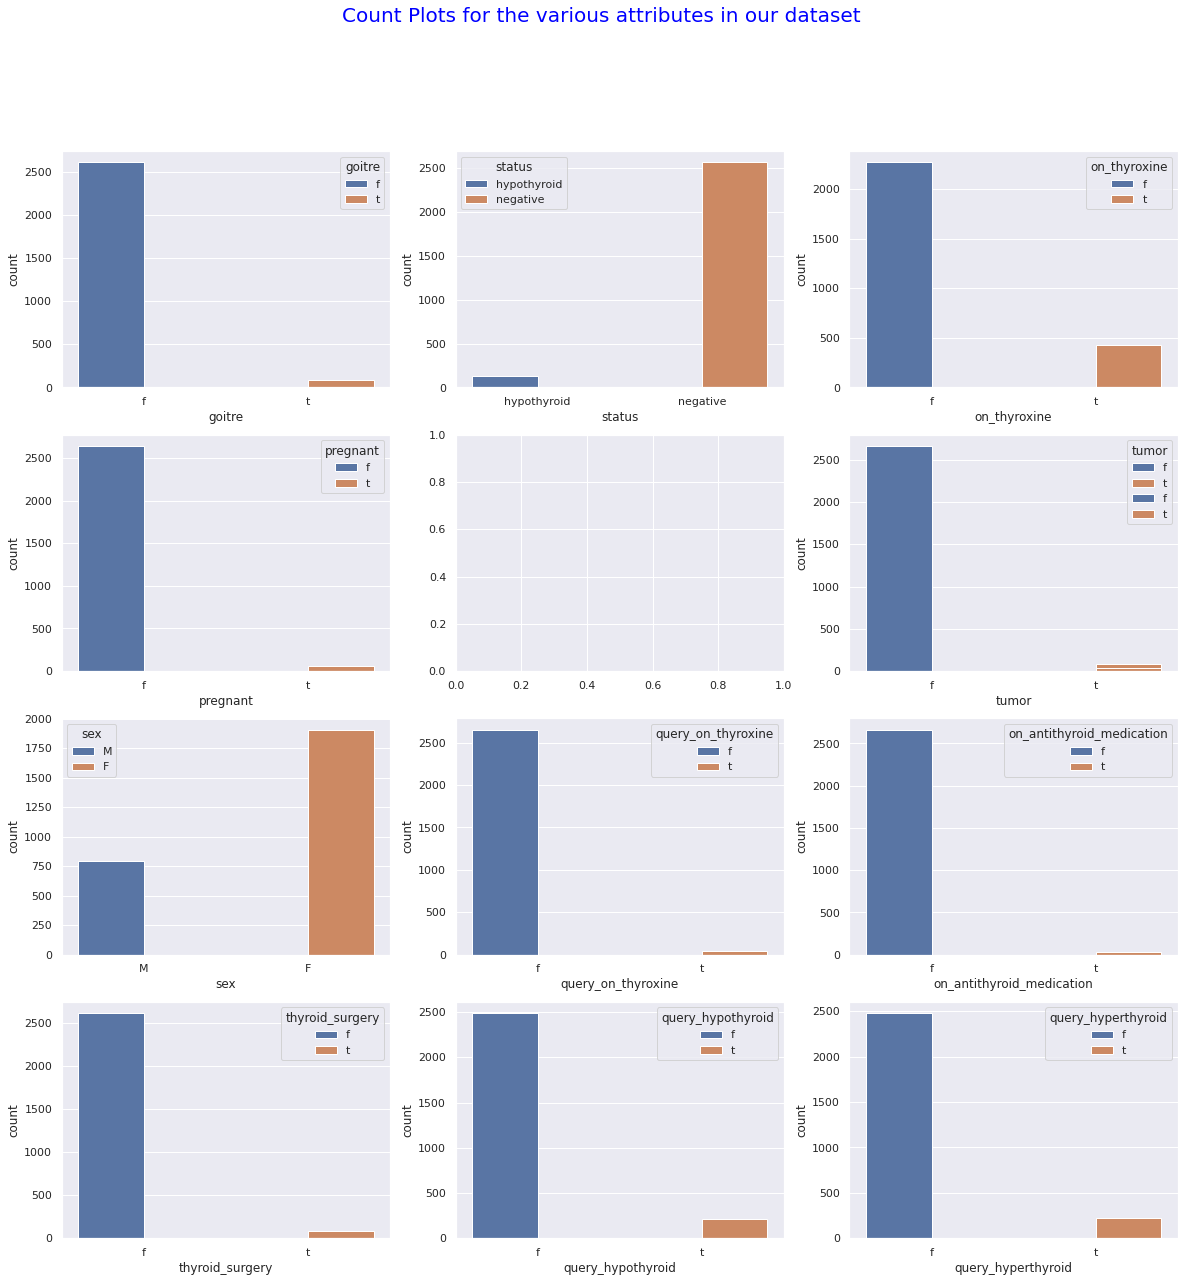

In [192]:
# Plotting Count Plots for the various attributes in our dataset
fig,axes=plt.subplots(4,3, figsize=(20,20))
fig.suptitle('Count Plots for the various attributes in our dataset', fontsize = 20, color='blue')
sns.countplot('goitre', data=hthyroid_df, hue='goitre', ax=axes[0,0])
sns.countplot('status', data=hthyroid_df, hue='status', ax=axes[0,1])
sns.countplot('on_thyroxine', data=hthyroid_df, hue='on_thyroxine', ax=axes[0,2])
sns.countplot('pregnant', data=hthyroid_df, hue='pregnant', ax=axes[1,0]);
sns.countplot('sick', data=hthyroid_df, hue='sick', ax=axes[1,2]);
sns.countplot('tumor', data=hthyroid_df, hue='tumor', ax=axes[1,2]);
sns.countplot('sex', data=hthyroid_df, hue='sex', ax=axes[2,0])
sns.countplot('query_on_thyroxine', data=hthyroid_df, hue='query_on_thyroxine', ax=axes[2,1])
sns.countplot('on_antithyroid_medication', data=hthyroid_df, hue='on_antithyroid_medication', ax=axes[2,2])
sns.countplot('thyroid_surgery', data=hthyroid_df, hue='thyroid_surgery', ax=axes[3,0])
sns.countplot('query_hypothyroid', data=hthyroid_df, hue='query_hypothyroid', ax=axes[3,1])
sns.countplot('query_hyperthyroid', data=hthyroid_df, hue='query_hyperthyroid', ax=axes[3,2]);

From the countplots, we can be able to gather some important information such as:
- Most people in the sample collected did not have goitre.
- Most people in the sample collected did not have hypothyroid.
- Most people in the sample collected did not have on_thyroxine.
- Most people in the sample collected were not pregnant.
- Most people in the sample collected were not sick.
- Most people in the sample collected did not have tumor.
- Most people in the sample collected were female.


###2. Bivariate Analysis

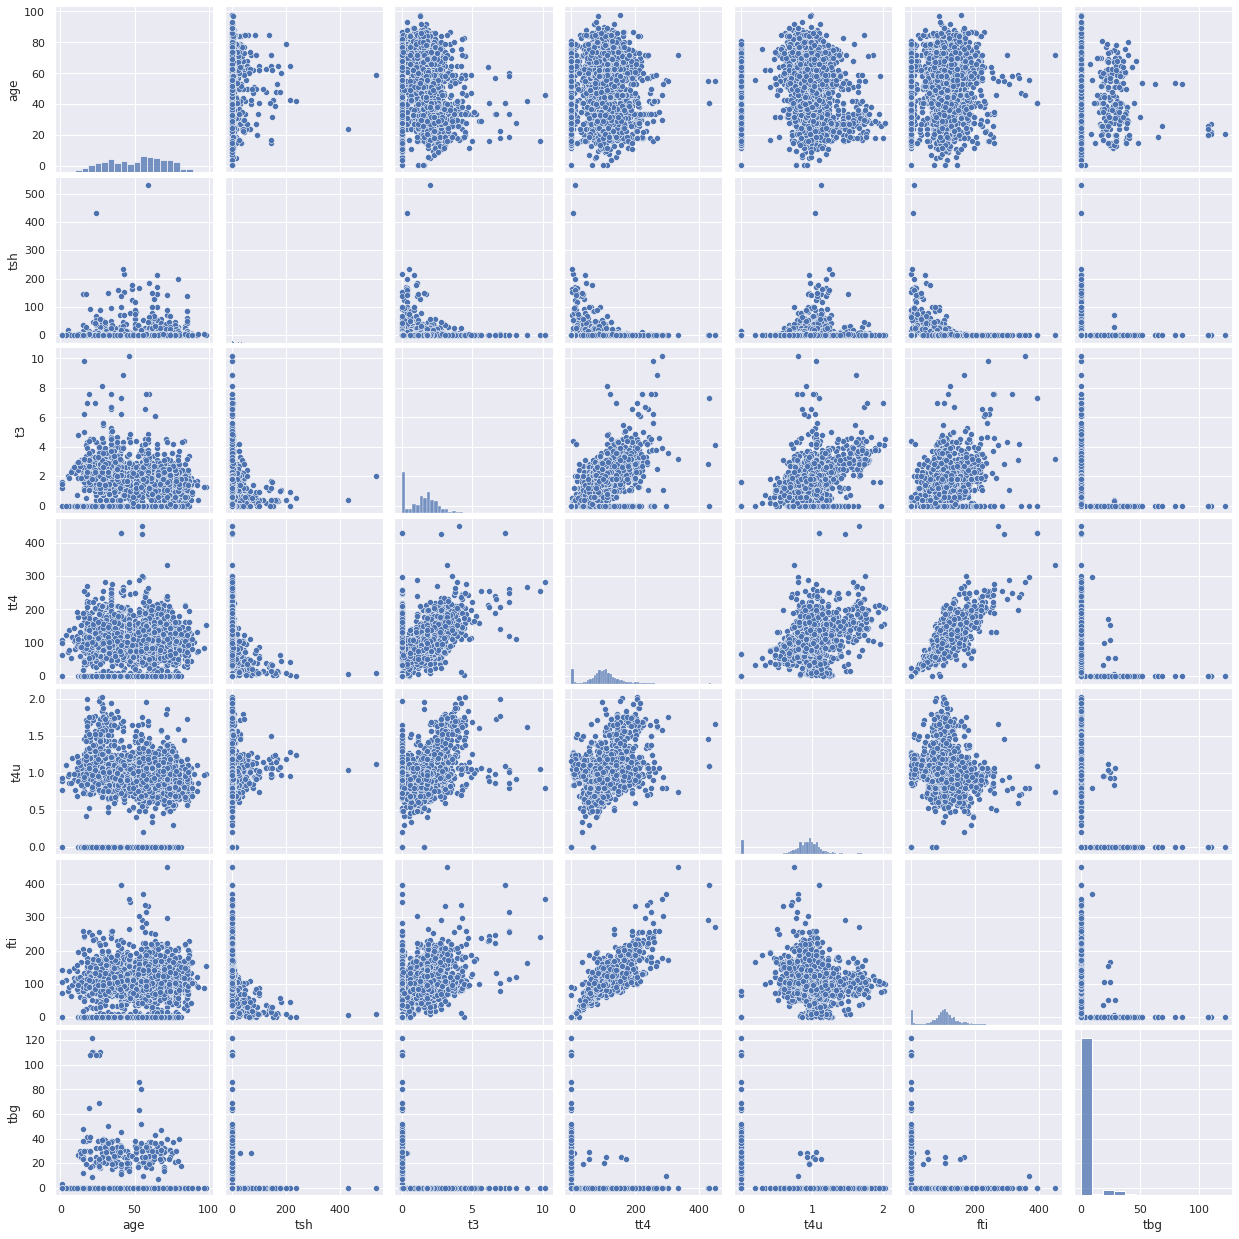

In [193]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(hthyroid_df)
plt.show()

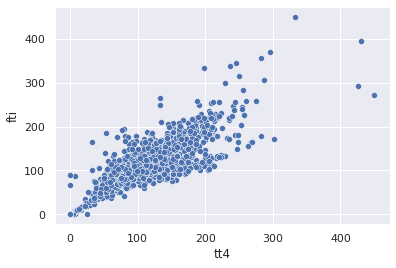

In [194]:
# Scatterplot showing if the TT4 is correlated to FTI
sns.scatterplot(x='tt4', y='fti',data=hthyroid_df);

From the scatter plot, we see that there is a positive correlation between FTI and TT4. The increase in one leads to the increase of the other.

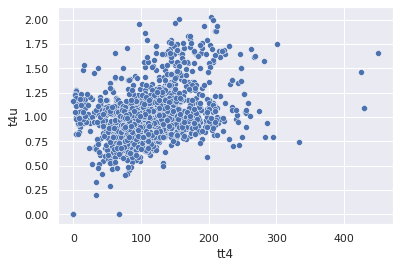

In [195]:
# Scatterplot showing if the TT4 is correlated to T4U
sns.scatterplot(x='tt4', y='t4u',data=hthyroid_df);

From the scatter plot, we see that there is a positive correlation between T4U and TT4. The increase in one leads to the increase of the other.

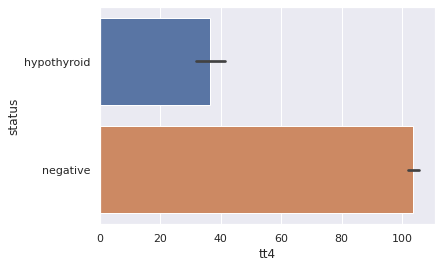

In [196]:
# Barplot showing if tt4 is correlated to status
sns.barplot(x='tt4', y='status',data=hthyroid_df);

From the bar plot, we observe that the presence of tt4 is not correlated to a person's hypothyroid status.

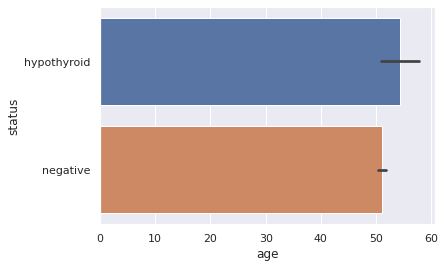

In [197]:
# Barplot showing if age is correlated to status
sns.barplot(x='age', y='status',data=hthyroid_df);

From the bar plot, we observe that the age does not have a strong correlation to a person's hypothyroid status.

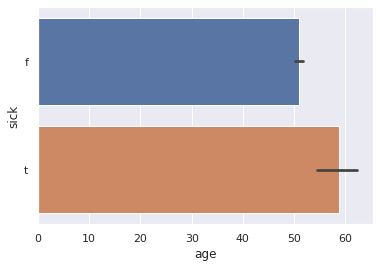

In [198]:
# Barplot showing if age is correlated to sickness
sns.barplot(x='age', y='sick',data=hthyroid_df);


From the bar plot, we observe that sickness is closely related to age.

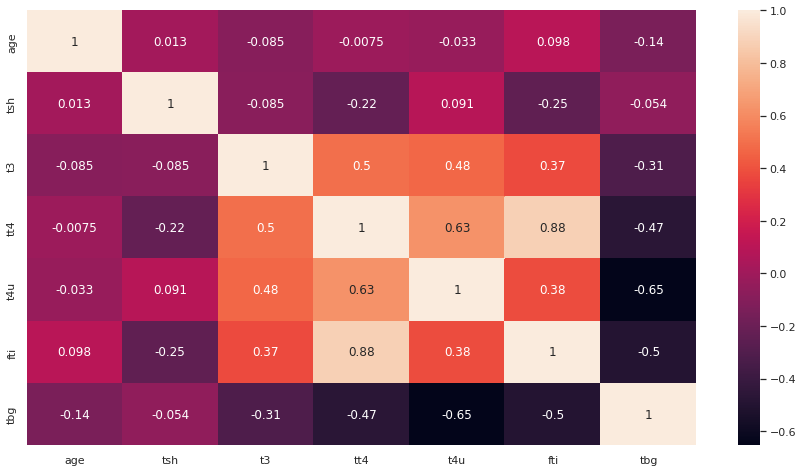

In [199]:
# Plotting a heatmap to show the correlation between the different numerical  variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(hthyroid_df.corr(),annot=True);

In the heatmap, the values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is(for instance, FTI and TT4). A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases (for instance, TBG and T4U).

From the table, we can see that the independent variables are not correlated. There is no value above 1.000

##7. Implementing the Solution

###7.1 Random Forest

In [201]:
# Split the independent and dependent variables
# We want to predict whether or not the patient's symptoms indicate that the patient has hypothyroid, so let's use that column as our Y 
test_features = hthyroid_df.columns.to_list()
test_features.remove('status')

# Picking our test features to be used in our X
X = hthyroid_df[test_features]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Encoding categocial variable
X=pd.get_dummies(X)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiating the model
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)


The accuracy score is: 0.9864197530864197 and the f1 score is 0.860759493670886
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.89      0.83      0.86        41

    accuracy                           0.99       810
   macro avg       0.94      0.91      0.93       810
weighted avg       0.99      0.99      0.99       810



array([[765,   4],
       [  7,  34]])

######Feature Importance

                             importance
feature                                
tsh                             0.26075
fti                             0.25909
tt4                             0.16382
t3                              0.05136
t4u                             0.04828
age                             0.03209
tsh_measured_n                  0.01983
t4u_measured_n                  0.01893
tsh_measured_y                  0.01883
t4u_measured_y                  0.01300
on_thyroxine_t                  0.00970
t3_measured_y                   0.00942
t3_measured_n                   0.00727
query_hypothyroid_f             0.00695
on_antithyroid_medication_f     0.00639
on_thyroxine_f                  0.00637
fti_measured_y                  0.00634
query_hypothyroid_t             0.00599
tt4_measured_n                  0.00592
tt4_measured_y                  0.00552
tbg_measured_n                  0.00531
sex_F                           0.00512
on_antithyroid_medication_t     0.00435


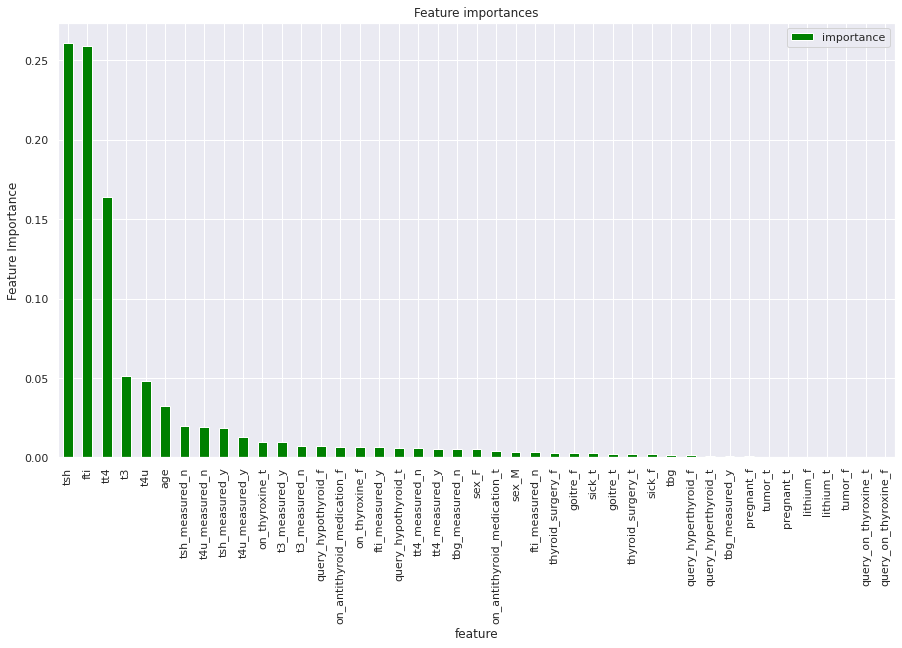

In [202]:
# Creating a feature importance dataframe
feature_impo=pd.DataFrame({'feature':X.columns, 'importance': np.round(forest.feature_importances_,5)}).set_index('feature').sort_values(by='importance', ascending=False)
print(feature_impo)

# Creating a bar plot for the feature importance
feature_impo.plot.bar(color='green')
plt.title("Feature importances")
plt.ylabel("Features")
plt.ylabel("Feature Importance")
plt.show()

After performing feature importance, the important features in our prediction modeling are TSH,FTI,TT4,T3,T4U.
We can therefore discard the rest and focus on the 5.

#### Modelling using the importance features

In [203]:
# Split the independent and dependent variables
test_features1=[['tsh','fti','tt4','t3','t4u']]
X = X[['tsh','fti','tt4','t3','t4u']]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Train using 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiating the model
forest = RandomForestClassifier(random_state=0)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9876543209876543 and the f1 score is 0.8780487804878049
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.88      0.88        41

    accuracy                           0.99       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  5,  36]])

After using the important features, there has been an improvement from 98.64% to 98.77% in the accuracy level. The f1_score has also improved from 86.08% to 87.80%.

#### Visualizing the 2nd Tree

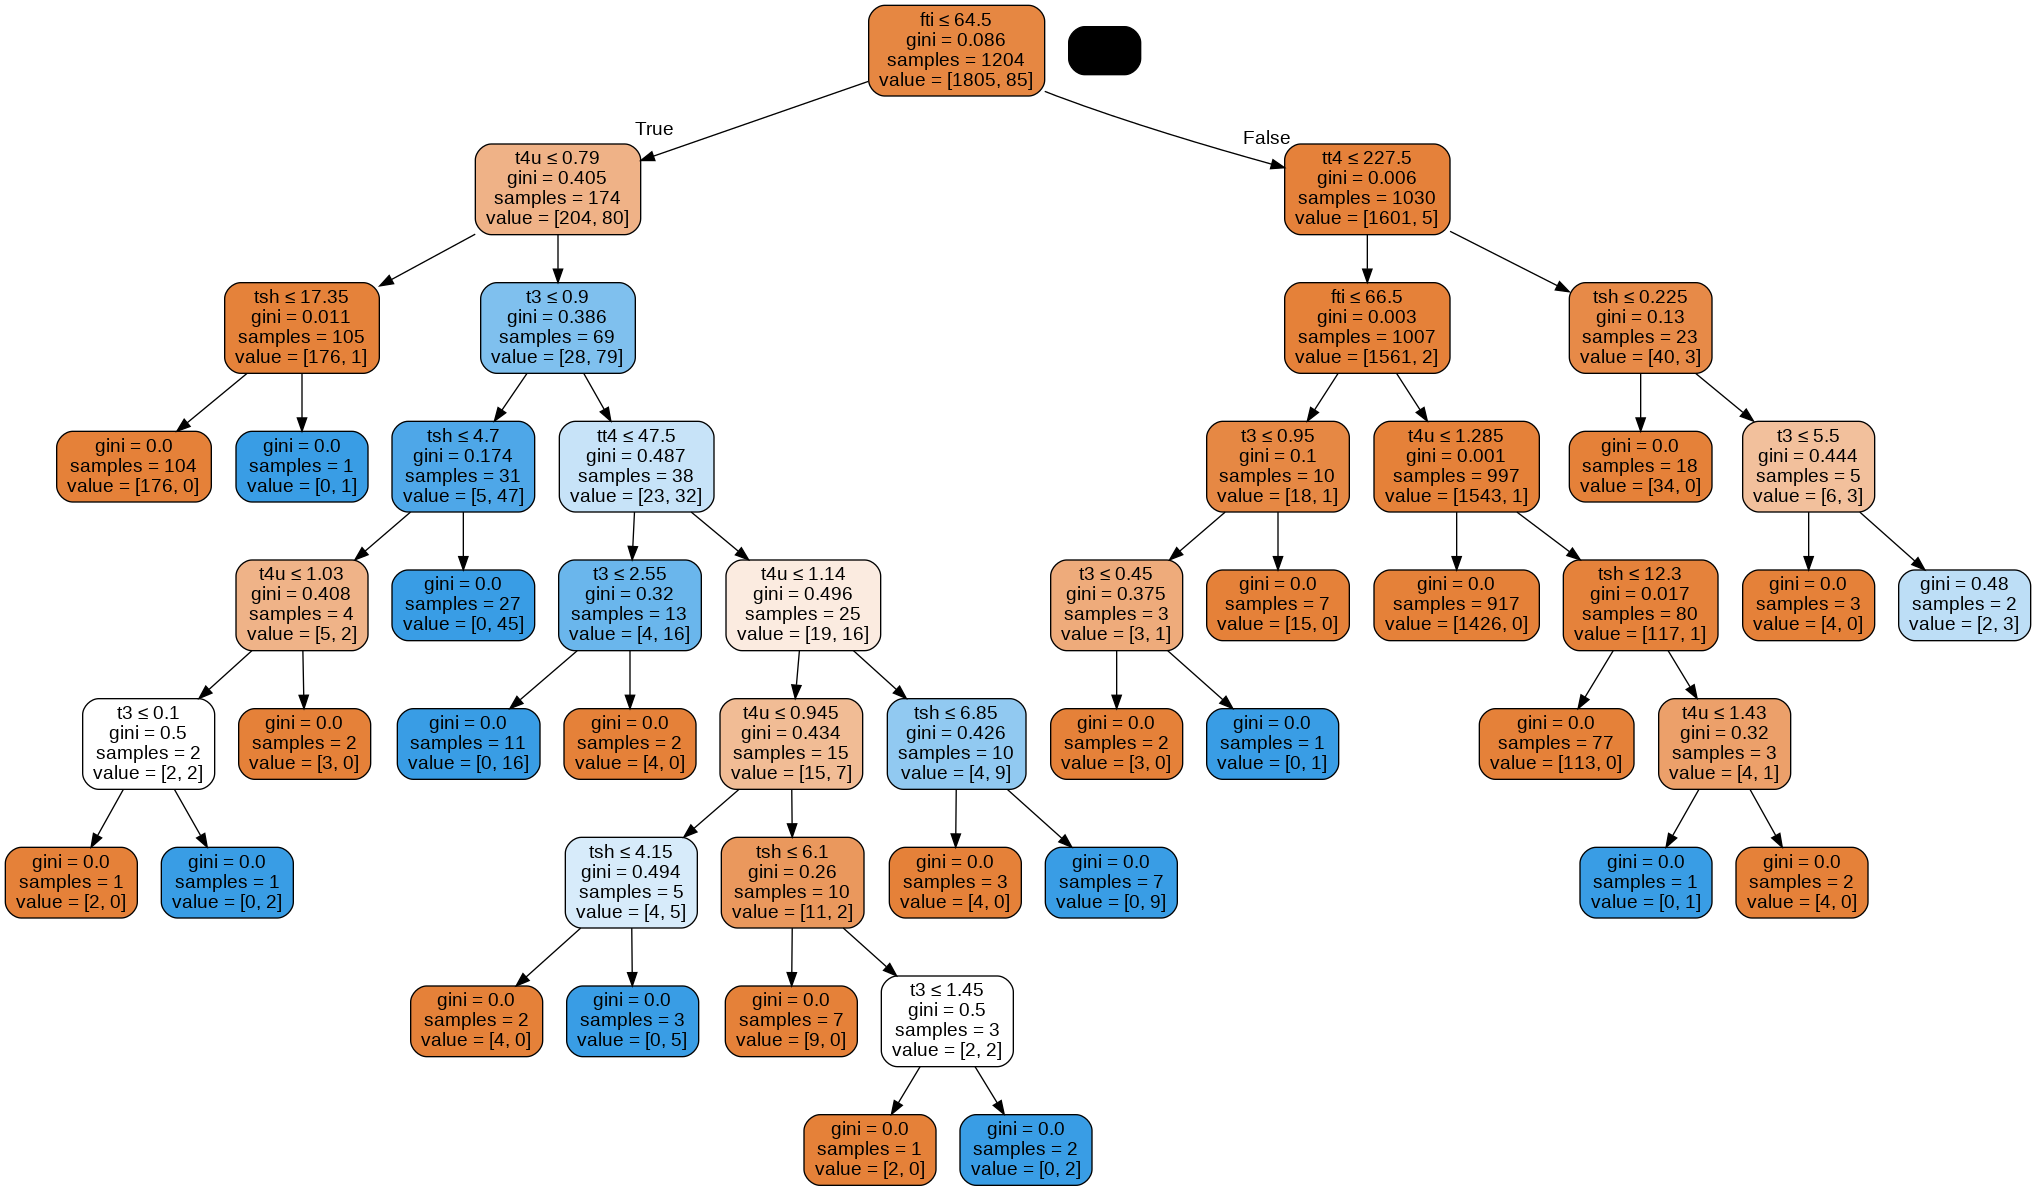

In [204]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
# Selecting the 2nd tree for visualization
tree=forest.estimators_[2]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('nbihospital_forest.png')
Image(graph.create_png())

#### Hyperparameter Tuning

In [205]:
# Creating a dictionary for the parameters to tune
grid_param = {
    'n_estimators': [5, 10, 15, 20, 25],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth':[1,2,3,4,5]
}

In [206]:
# Instantiating the model
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=None)

In [207]:
# Fitting the grid search in our X_train and y_train
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25]},
             scoring='accuracy')

In [208]:
# Finding the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}


In [216]:
# Split the independent and dependent variables
X = X[['tsh','fti','tt4','t3','t4u']]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Tuning our Parameters
forest = RandomForestClassifier(n_estimators=10, max_depth=5, bootstrap=False, criterion="gini", random_state=0)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

After tuning our parameters (n_estimators=10, max_depth=5, bootstrap=False, criterion="gini"), the accuracy and f1 score have increased compared to when we had not tuned our model. The accuracy has gone up from 98.77% to 98.89%. The f1 score has also improved from 87.08% to 89.16%.

Now let's predict whether a patient has hypothyroid or not using our model that has not been tuned because it provides a better accuracy level compared to when we perform hyperparameter tuning.

#### Cross-validating to Evaluate the Model Performance

In [210]:
# evaluate the model
n_scores = cross_val_score(forest, X, y, scoring='f1', cv=10, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f' % ((n_scores.mean())))
print('Standard Deviation: %.3f' % (n_scores.std()))

Accuracy: 0.894
Standard Deviation: 0.088


###7.2 Ada boosted trees

In [212]:
# Split the independent and dependent variables
# We want to predict whether or not the patient's symptoms indicate that the patient has hypothyroid, so let's use that column as our Y 
test_features = hthyroid_df.columns.to_list()
test_features.remove('status')

# Split the independent and dependent variables
X = hthyroid_df[test_features]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Encoding the categorical variables
X=pd.get_dummies(X)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiating the model
ada_boost = AdaBoostClassifier(random_state=0)

# Fitting the model in our X_train and y_train and making predictions
ada_boost=ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)


The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

#### Feature Importance

                             importance
feature                                
tsh                                0.32
tt4                                0.14
t4u                                0.14
t3                                 0.12
fti                                0.10
age                                0.08
on_antithyroid_medication_t        0.04
on_thyroxine_f                     0.02
on_thyroxine_t                     0.02
tsh_measured_y                     0.02
t3_measured_y                      0.00
lithium_t                          0.00
goitre_f                           0.00
goitre_t                           0.00
tsh_measured_n                     0.00
t3_measured_n                      0.00
t4u_measured_n                     0.00
tt4_measured_n                     0.00
tt4_measured_y                     0.00
tumor_t                            0.00
t4u_measured_y                     0.00
fti_measured_n                     0.00
fti_measured_y                     0.00


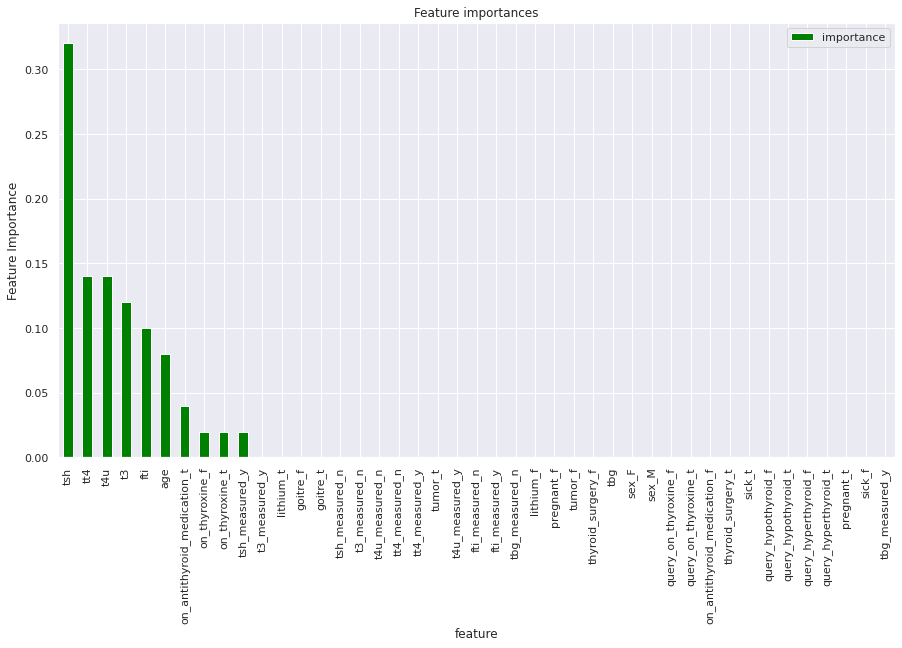

In [213]:
# Creating a feature importance dataframe
feature_impo=pd.DataFrame({'feature':X.columns, 'importance': np.round(ada_boost.feature_importances_,5)}).set_index('feature').sort_values(by='importance', ascending=False)
print(feature_impo)
# Plotting the feature importance using bar graph
feature_impo.plot.bar(color='green')
plt.title("Feature importances")
plt.ylabel("Features")
plt.ylabel("Feature Importance")
plt.show()

After performing feature importance, the important features in our prediction modeling are TSH,TT4,T4U,T3, and FTI.
We can therefore discard the rest and focus on the 5.

#### Modelling using the importance features

In [214]:
# Split the independent and dependent variables
test_features1=[['tsh','tt4','t4u','t3','fti']]
X = X[['tsh','tt4','t4u','t3','fti']]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Instantiang the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ada_boost = AdaBoostClassifier(random_state=0)

# Fitting the model in our X_train and y_train
ada_boost=ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

There has been no change from the initial values when we did not use the important features. The accuracy level and f1 score remains the same whether we use important features or not.

#### Visualizing the 2nd tree

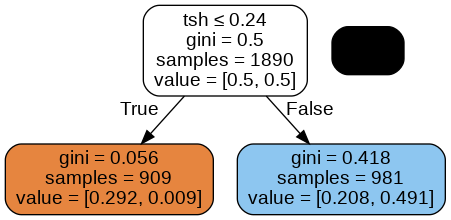

In [215]:
# Selecting the 2nd tree
tree=ada_boost.estimators_[2]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('nbihospital_adaboost.png')
Image(graph.create_png())

#### Hyperparameter Tuning

In [217]:
# Creating a dictionary for the parameters to tune
grid_param = {
    'n_estimators': [5, 10, 15, 20, 25],
    'learning_rate': [1,2,3,4,5],
}

In [218]:
# Instantiating the model
gd_sr = GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)

In [219]:
# Fitting our model in our X_train and y_train
gd_sr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25]},
             scoring='accuracy')

In [220]:
# Selecting the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'learning_rate': 1, 'n_estimators': 15}


In [221]:
# Split the independent and dependent variables
test_features1=[['tsh','tt4','t4u','t3','fti']]
X = X[['tsh','tt4','t4u','t3','fti']]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Intantiating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ada_boost = AdaBoostClassifier(learning_rate=1, n_estimators=15, random_state=0)

# Fitting the model in our X_train and y_train and making predictions
ada_boost=ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

There has been no change from the initial values when we did not tune our parameters. The accuracy level and f1 score remains the same whether we tune parameters or not.

#### Cross-validating to Evaluate the Model Performance

In [222]:
# evaluate the model
n_scores = cross_val_score(ada_boost, X, y, scoring='f1', cv=10, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f' % ((n_scores.mean())))
print('Standard Deviation: %.3f' % (n_scores.std()))

Accuracy: 0.856
Standard Deviation: 0.097


When we cross-validate the accuracy level of Random Forest and Ada Boost, Random Forest is better because it has a score of 89.4%, compared to that of Ada Boost, which is 85.6%.
Therefore, Random Forest is better for our prediction model.

###7.2 Support Vector Machines (SVM)

In [223]:
# Defining the test features
test_features = hthyroid_df.columns.to_list()
test_features.remove('status')

# Splitting the independent and dependent variables
X = hthyroid_df[test_features]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Encoding the categorical variables
X=pd.get_dummies(X)

# Instantiating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

# Making predictions 
prediction = svc_model.predict(X_test)
# Check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.9851851851851852
0.9765432098765432
Confusion Matrix:
 [[761  11]
 [  8  30]]


In [80]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.9804232804232804
0.9790123456790123
Confusion Matrix:
 [[763  11]
 [  6  30]]


In [81]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.9582010582010582
0.9555555555555556
Confusion Matrix:
 [[765  32]
 [  4   9]]


####Hyperparameter Tuning

In [224]:
# Creating a dictionary for the paramaters to tune
grid_param = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

In [225]:
# Instantiating the model
gd_sr = GridSearchCV(estimator=SVC(kernel='linear'),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)

In [226]:
# Fitting the grid search into our X_train and y_train
gd_sr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy')

In [228]:
# Selecting the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 100, 'gamma': 1}


#### Modelling with our tuned parameters

In [227]:
# Defining the test features
test_features = hthyroid_df.columns.to_list()
test_features.remove('status')

# Splitting our independent and dependent variables
X = hthyroid_df[test_features]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Encoding the categorical variable
X=pd.get_dummies(X)

#Instantiating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Building a Support Vector Machine on train data
svc_model = SVC(C= 100, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

# Making predictions
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.9857142857142858
0.9777777777777777
Confusion Matrix:
 [[761  10]
 [  8  31]]


In [229]:
# evaluate the model
n_scores = cross_val_score(svc_model, X, y, scoring='f1', cv=10)
# report performance
print('Accuracy: %.3f' % ((n_scores.mean())))
print('Standard Deviation: %.3f' % (n_scores.std()))

Accuracy: 0.800
Standard Deviation: 0.108


-The best model for our prediction is the Random Forest Classifier, which gives an accuracy level of 89.4%. 

-Below is the prediction of the status of a patient using Random Forest.

#### Predicting using the AdaBoostClassifier with the Important Features

In [232]:
# Predicting using the AdaBoostClassifier using the important features only
print(forest.predict([[30.0, 10.0, 15.0, 0.6, 1.48]]))
print(forest.predict([[5.8, 95.0, 86.0, 1.7, 0.91]]))

[1]
[0]


Here, 1 indicates that the symptoms indicate that the patient has hypothyroid, while 0 indicates the patient does not have hypothyroid. On cross-checking on our dataset, the results are accurate.

##8. Challenging the Solution

#### Gradient Boosted Trees

In [233]:
# Split the independent and dependent variables
# We want to predict whether or not the patient's symptoms indicate that the patient has hypothyroid, so let's use that column as our Y 
test_features = hthyroid_df.columns.to_list()
test_features.remove('status')

# Splitting our independent and dependent variables
X = hthyroid_df[test_features]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)

# Encoding the categorical variables
X=pd.get_dummies(X)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Intsntiating the model and fitting it to our X_train and y_train
gradient_boost = GradientBoostingClassifier(random_state=0)
gradient_boost.fit(X_train, y_train)

# Making predictions
y_pred_grad = gradient_boost.predict(X)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

                             importance
feature                                
tsh                             0.60439
fti                             0.32179
tt4                             0.02009
t3                              0.01508
t4u                             0.00905
on_antithyroid_medication_f     0.00708
on_antithyroid_medication_t     0.00674
age                             0.00474
query_hypothyroid_f             0.00405
on_thyroxine_f                  0.00265
on_thyroxine_t                  0.00178
query_hypothyroid_t             0.00112
tsh_measured_n                  0.00107
thyroid_surgery_t               0.00024
thyroid_surgery_f               0.00012
tbg_measured_n                  0.00000
goitre_t                        0.00000
tsh_measured_y                  0.00000
t3_measured_n                   0.00000
t3_measured_y                   0.00000
fti_measured_n                  0.00000
tt4_measured_n                  0.00000
tt4_measured_y                  0.00000


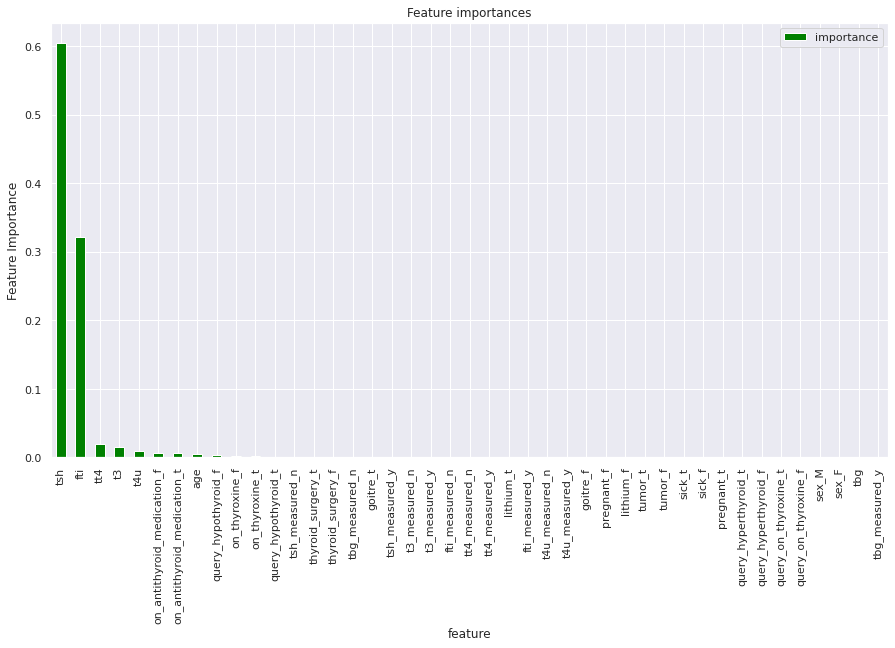

In [234]:
# Creating a feature importance dataframe
feature_impo=pd.DataFrame({'feature':X.columns, 'importance': np.round(gradient_boost.feature_importances_,5)}).set_index('feature').sort_values(by='importance', ascending=False)
print(feature_impo)

feature_impo.plot.bar(color='green')
plt.title("Feature importances")
plt.ylabel("Features")
plt.ylabel("Feature Importance")
plt.show()

In [235]:
# Split the independent and dependent variables
test_features1=[['tsh','fti','tt4','t3','t4u']]
X = X[['tsh','fti','tt4','t3','t4u']]
y = np.where(hthyroid_df.status == 'hypothyroid', 1,0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0) 

gradient_boost=gradient_boost.fit(X_train, y_train)
y_pred_ada = gradient_boost.predict(X)

# Measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test,y_pred)} and the f1 score is {f1_score(y_test,y_pred)}')
print(f'{classification_report(y_test,y_pred)}')
confusion_matrix(y_test,y_pred)

The accuracy score is: 0.9888888888888889 and the f1 score is 0.8915662650602411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.88      0.90      0.89        41

    accuracy                           0.99       810
   macro avg       0.94      0.95      0.94       810
weighted avg       0.99      0.99      0.99       810



array([[764,   5],
       [  4,  37]])

The GradientBoostingClassifier as produces the same accuracy level and F1_score as AdaBoostClassifier

## Conclusion and Recommendation

- From the models created in this analysis, the best model that offers a higher accuracy is Random Forest Classifier with an accuracy level of 89.4% and f1 score of 87.80%. I will therefore recommend the Random Forest Classifier.
- In the case of SVM, the best Kernel is Linear, which gives an accuracy of 98.52%.
- From the modelling, the features that appear to be of great importance in building a prediction model are:

1. TSH

2. FTI

3. TT4

4. T4U
